# MSDS 430 Module 10 Python Assignment

<div class="alert alert-block alert-warning"><b>
This is a cumulative assignment that will put to use many of the Python skills you have learned this quarter. You will not be provided with TODO statements to guide you in completing each problem as was done with previous assignments. The intent is that you draw upon your knowledge from the course and complete each problem on your own without specific guidance on intermediate steps.
    
</b>
</div>

In [29]:
# https://www.maritime.dot.gov/data-reports/data-statistics/us-waterborne-foreign-container-trade-us-customs-ports-2000-%E2%80%93-2017

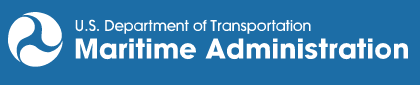

In [30]:
# load libraries
import pandas as pd
import numpy as np
 
# set output for zero decimals places and commas to denote thousands
pd.options.display.float_format = '{:,.2f}'.format

# allow multiple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-success">
<b> Problem 1: (3 points) </b> In Module 4 you learned how to use Pandas to read in different file types. Use Pandas to read the <mark>Import and Export tons.csv</mark> file provided into a dataframe called <mark>df</mark>. <br>

1. Read in the file.<br>
2. Display the columns in the file and the number of records.<br>
3. Display the first 10 records of your dataframe.

</div>

In [31]:
df=pd.read_csv("/Users/michaelrocchio/Desktop/MSDS_430/Module10/Import and Export tons.csv")
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   U.S. Custom Ports  1134 non-null   object 
 1   Coast              1134 non-null   object 
 2   Year               1134 non-null   int64  
 3   ImportTons         1134 non-null   float64
 4   ExportTons         1134 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 44.4+ KB
None


,U.S. Custom Ports,Coast,Year,ImportTons,ExportTons
0,"Aberdeen, WA",P,2000,0.00,0.00
1,"Anacortes, WA",P,2000,0.00,0.00
2,"Anchorage, AK",AK,2000,0.00,"11,414.60"
3,"Baltimore, MD",A,2000,"172,563.87","103,391.30"
4,"Baton Rouge, LA",G,2000,1.50,0.00
5,"Beaufort-Morehead City, NC",A,2000,0.00,26.07
6,"Beaumont, TX",G,2000,169.00,43.39
7,"Boston, MA",A,2000,"54,222.41","19,277.91"
8,"Brunswick, GA",A,2000,0.00,52.00
9,"Camden, NJ",A,2000,298.23,"6,247.76"


<div class="alert alert-block alert-success">
    <b> Problem 2: (3 points) </b> in Modules 6 and 7, you learned how to create and work with dictionaries. As you look at the values in the dataframe, the <b>Coast</b> column contains abbreviations so let's create a data dictionary using the abbreviations as keys and the full names as values. After creating this dictionary, use it to add a new column in the <b>df</b> dataframe called <b>CoastName</b>.<br>
    
The abbreviations have the following meanings: P is Pacfic, A is Atlantic, G is Gulf, AK is Alaska, HI is Hawaii and PR is Puerto Rico. <br>
 
Demonstrate that the new column has been added by displaying the first five rows of <b>df</b>.
</div>

In [32]:
coastname = {"P":"Pacific", "A":"Atlantic", "G":"Gulf", "AK":"Alaska", "HI":"Hawaii","PR": "Puerto Rico"}
df['CoastName'] = df['Coast'].map(coastname)
df.head()

,U.S. Custom Ports,Coast,Year,ImportTons,ExportTons,CoastName
0,"Aberdeen, WA",P,2000,0.00,0.00,Pacific
1,"Anacortes, WA",P,2000,0.00,0.00,Pacific
2,"Anchorage, AK",AK,2000,0.00,"11,414.60",Alaska
3,"Baltimore, MD",A,2000,"172,563.87","103,391.30",Atlantic
4,"Baton Rouge, LA",G,2000,1.50,0.00,Gulf


<div class="alert alert-block alert-success">
<b> Problem 3: (2 points) </b> In Module 6 you learned how to drop a column from a dataframe. We no longer need the column called <i><b>Coast</b></i>, so drop it.  Demonstrate that your dataframe no longer has this column by displaying the first 5 rows.
</div>

In [33]:
df.drop(['Coast'], axis=1, inplace=True)
df.head()

,U.S. Custom Ports,Year,ImportTons,ExportTons,CoastName
0,"Aberdeen, WA",2000,0.00,0.00,Pacific
1,"Anacortes, WA",2000,0.00,0.00,Pacific
2,"Anchorage, AK",2000,0.00,"11,414.60",Alaska
3,"Baltimore, MD",2000,"172,563.87","103,391.30",Atlantic
4,"Baton Rouge, LA",2000,1.50,0.00,Gulf


<div class="alert alert-block alert-success">
<b> Problem 4: (4 points) </b> In Module 4 you learned about string manipulation.  You may need to do some further research, but the use of <mark>.slice</mark> and <mark>.split</mark> could be useful in this next answer.
    
Create two new columns in the <b>df</b> dataframe - from the U.S. Custom Ports column - create a <b>City</b> and a <b>State</b> column. It is okay to leave the State in the two letter abbreviation format. Neither the <b>City</b> nor the <b>State</b> should contain the comma from the U.S. Custom Ports field.<br>
    
Show your new columns by displaying the first five records of <b>df</b>.
</div>

In [34]:
df[['City', 'State']] = df['U.S. Custom Ports'].str.split(',', expand=True)
## there are spaces annoying me
df['State']=df['State'].str.replace(' ','')
df.head(5)

,U.S. Custom Ports,Year,ImportTons,ExportTons,CoastName,City,State
0,"Aberdeen, WA",2000,0.00,0.00,Pacific,Aberdeen,WA
1,"Anacortes, WA",2000,0.00,0.00,Pacific,Anacortes,WA
2,"Anchorage, AK",2000,0.00,"11,414.60",Alaska,Anchorage,AK
3,"Baltimore, MD",2000,"172,563.87","103,391.30",Atlantic,Baltimore,MD
4,"Baton Rouge, LA",2000,1.50,0.00,Gulf,Baton Rouge,LA


<div class="alert alert-block alert-success">
<b> Problem 5: (6 points) </b> In Module 5 you learned how to create a subset of a dataframe and to show the top values of a column.  <br><br>
    1. First create a new column in <b>df</b> called <b>Difference</b> that displays the difference in tons between imports and exports<br>
    2. Create a new dataframe called <b>year2017</b> that only contains the 2017 data in <b>df</b>.  Use this dataframe to answer 3 - 5 below.<br>
3. Show the top three Ports with the most ImportTons.<br>
4. Show the top five States with the most ImportTons.<br>
5. Show the top ten Ports in regards to the highest Difference (larger number is better) in imports compared to exports.
</div>

In [35]:
df['Difference']=abs(df['ImportTons'] - df['ExportTons'])

In [40]:
year2017=df[df['Year']==2017]
year2017.sort_values(by='ImportTons', ascending=False)[['U.S. Custom Ports', 'ImportTons']].head(3)

,U.S. Custom Ports,ImportTons
1099,"Los Angeles, CA","4,590,451.38"
1097,"Long Beach, CA","3,792,165.13"
1104,"New York, NY","3,402,439.97"


In [39]:
year2017=df[df['Year']==2017]
year2017.groupby(['State'],as_index=False)[['ImportTons']].sum().sort_values(by='ImportTons', ascending=False)[['State', 'ImportTons']].head(5)

,State,ImportTons
2,CA,"9,382,574.12"
15,NY,"3,402,439.97"
5,GA,"1,862,999.96"
22,WA,"1,374,608.52"
21,VA,"1,234,737.43"


In [41]:
year2017.sort_values(by='Difference', ascending=False)[['U.S. Custom Ports', 'Difference']].head(10)

,U.S. Custom Ports,Difference
1099,"Los Angeles, CA","2,991,741.77"
1097,"Long Beach, CA","2,574,840.19"
1104,"New York, NY","2,037,601.15"
1126,"Savannah, GA","563,101.66"
1106,"Norfolk, VA","277,710.98"
1128,"Tacoma, WA","275,996.12"
1074,"Baltimore, MD","233,303.28"
1127,"Seattle, WA","203,657.24"
1111,"Philadelphia, PA","192,128.30"
1103,"New Orleans, LA","186,438.97"


<div class="alert alert-block alert-success">
<b> Problem 6: (7 points) </b> In Module 2 you learned about mathematical operators and in Modules 2 and 3 you learned about conditional statements, loops and user defined functions.<br>

- Write a function called <b>BestYears</b> that will accept <b>City</b> and <b>State</b> as arguments. 
- If the City does not appear in the dataframe, then the function should display the error message <mark>City does not exist</mark>.
- If the City appears but not with that State in the combo, then the function should display the error message <mark>Invalid Input</mark>.  
- If the City and State combo appears in the dataframe, then the function should display the City, State, Year, ImportTons, ExportTons and Difference sorted by Year with the oldest year showing first.<br>
    
**Use different cells to test your function with each of the following:**
1. Norfolk and VA - this should show output data
2. Norfolk and CA - this one should show the error message <mark>Invalid Input</mark>.
3. Python and MA - this one should show the error message <mark>City does not exist</mark>.
    

</div>

In [70]:
def BestYears(City,State):
    mapping1=list(map(lambda x:(x[0].strip(),x[1].strip()),list(year2017["U.S. Custom Ports"].str.split(","))))
    mapping2=list(map(lambda x:x[0],map(lambda x:(x[0].strip(),x[1].strip()),list(year2017["U.S. Custom Ports"].str.split(",")))))
    if (City,State) in mapping1:
        return df[df["U.S. Custom Ports"]=='{}, {}'.format(City, State)].sort_values(by="Year")
    elif City not in mapping2:
        return "City does not exist."
    elif City in mapping2:
        return "Invalid Input"

In [71]:
BestYears("Norfolk","VA")

,U.S. Custom Ports,Year,ImportTons,ExportTons,CoastName,City,State,Difference
35,"Norfolk, VA",2000,"437,522.50","412,877.64",Atlantic,Norfolk,VA,"24,644.86"
98,"Norfolk, VA",2001,"454,216.30","431,175.96",Atlantic,Norfolk,VA,"23,040.34"
161,"Norfolk, VA",2002,"551,168.00","430,838.77",Atlantic,Norfolk,VA,"120,329.23"
224,"Norfolk, VA",2003,"633,455.09","459,751.91",Atlantic,Norfolk,VA,"173,703.18"
287,"Norfolk, VA",2004,"717,346.35","488,687.22",Atlantic,Norfolk,VA,"228,659.13"
350,"Norfolk, VA",2005,"780,917.57","543,589.39",Atlantic,Norfolk,VA,"237,328.18"
413,"Norfolk, VA",2006,"834,197.96","579,727.70",Atlantic,Norfolk,VA,"254,470.26"
476,"Norfolk, VA",2007,"857,702.55","727,528.43",Atlantic,Norfolk,VA,"130,174.12"
539,"Norfolk, VA",2008,"811,381.80","783,293.55",Atlantic,Norfolk,VA,"28,088.25"
602,"Norfolk, VA",2009,"677,798.37","698,141.44",Atlantic,Norfolk,VA,"20,343.07"


In [72]:
BestYears("Norfolk","CA")

'Invalid Input'

In [73]:
BestYears("Python","MA")

'City does not exist.'